A basic SIR model, such as the one that we will now proceed to study, includes three cathegories: 

* Susceptibles: The individuals that may be infected
* Infected: The individuals currently carrying the virus, which can pass it on to the next generation
* Recovered: Those that have been infected, have recovered, and cannot pass on the infection (this model assumes permanent inmunity)

Which relate among them using the following parameters:

* $\beta$: number of infected persons per sick individual per day.
* $\mu$: 1/period of infection. This is the rate at which infected individuals recover.

Thus, we get the following set of equations that define the model:

$$\frac{dS}{dt} = -\beta S I \qquad \frac{dI}{dt} = \beta S I - \mu I \qquad \frac{dR}{dt} = \mu I$$

As we can see, the system does not explicitly reference time, and rather works indirectly with the variation in the population of the different epidemiological groups. Given that $\mu$ is defined as the time an individual takes to recover, we can define the parameter $\tau = \mu^{-1}$ as the average time an individual remains infected. To set an epidemic treshold, we can use $R_{0}$, a [tried and tested parameter](https://pubmed.ncbi.nlm.nih.gov/25365599/) defined as: 

$$R_{0} = \frac{\beta \cdot S_{0}}{\mu}$$

Here, if $R_{0}$ > 1, the infection propagates, growing exponentially; if, however, $R_{0}$ < 1, the infection progressively deflates, ending eventually. In this model, the longer an individual spends Infected ($\uparrow \tau$, and thus $\downarrow \mu$), the higher the $R_{0}$, and, thus, the more contagious the infection is. For $\beta$, the effect is the opposite: the more individuals one is able to infect, the more contagious the disease gets.

To understand the effecfts of the initial conditions, we can use the plane phase:

In [1]:
#Imports module
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plane_phase(b, u):
    S, I = np.meshgrid(np.arange(0,10,1), np.arange(0,10,1))
    f = -b*S*I
    g = b*S*I-u*I
    plt.quiver(S,I,f,g)
    plt.title('Quiver graph for β = {0} & u = {1}'.format(b, u))
    plt.xlabel('Susceptible')
    plt.ylabel('Infected')

We can plot it for different parameter values that generate an $R_{0}$ above the epidemic value of 1:

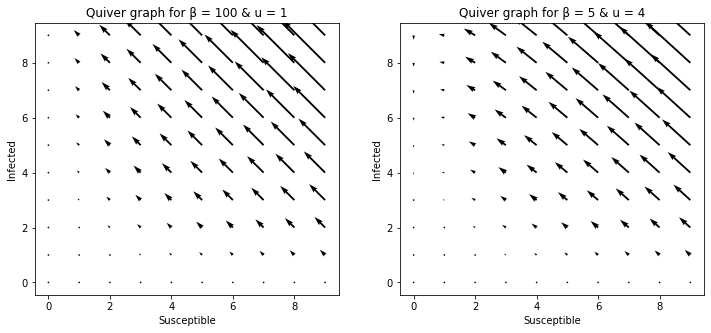

In [3]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
plane_phase(100, 1)
plt.subplot(1, 2, 2)
plane_phase(5, 4)
plt.show()

As we can see, despite the different set values, if $R_{0}$ > 1, the infected population grows quickly, making the susceptible population decrease as fast (since N = I + S + R = constant). If, however, we select values which get us to an $R_{0}$ < 1, we get an increasingly smaller infected population, with susceptibles decreasing or even staying the same as the epidemic extinguishes so fastly it cannot even turn Susceptibles to Infected an Recovered at a rate big enough to show in the graph. As we can see in the last example, values of $\beta$ = 1 and $\mu$ = 1 do not necessarily produce neither $R_{0}$ = 1 (as it is also dependent on $S_{0}$) nor stability (as will be discussed below).

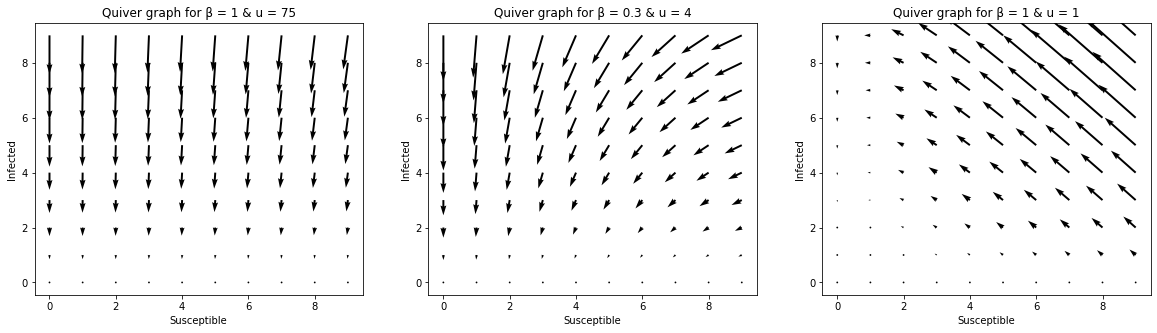

In [4]:
plt.subplots(figsize=(20, 5))
plt.subplot(1, 3, 1)
plane_phase(1, 75)
plt.subplot(1, 3, 2)
plane_phase(0.3, 4)
plt.subplot(1, 3, 3)
plane_phase(1, 1)
plt.show()

With regards to stability, we can mathematically analyze the system. Since the population, N, remains constant (as the model ignores new births and deaths), we can skip the Recovered class in order to understand how the system behaves (See "Mathematical Models in Biology, by Leah Edelstein, page 247): it would be simply equivalent to saying that all Recovered patients go outside the scope of the model, since, assuming they are inmune,they can no longer go back to any other compartiment, and stop being of interest to us.

In [5]:
import sympy as sp
import warnings
warnings.filterwarnings("ignore")

In [6]:
S, I, R, b, u = sp.symbols('S I R β 𝜇')

In [7]:
f = -b*S*I
g = b*S*I-u*I
f, g

(-I*S*β, I*S*β - I*𝜇)

In [8]:
sp.solve([f, g], [S, I])

[]

As we can see, the model has no solution, no steady states and no points where the population of Infected and Susceptible individuals remain unchanged. This makes sense: the model assumes a constant population N = I + S + R, and with S only able to decrease and R only able to increase, as new births and deaths are not accounted for. This result is consistent with what we found when playing with the plane phase: there are no points of stability, only inevitable derive towards extinction or full infection and recovery

The maximum incidence, i.e. the moment in time with the most infected individuals, can be graphically plotted as:

In [9]:
from scipy.integrate import odeint
import mpld3
mpld3.enable_notebook()

In [10]:
def deriv(y, t, N, beta, u):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - u * I
    dRdt = u * I
    return dSdt, dIdt, dRdt

In [11]:
N = 1000

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible

t = np.linspace(0, 39, 40) # Grid of time units
y0 = S0, I0, R0 # Initial conditions vector

In [12]:
def plotsir(t, S, I, R):
    plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    plt.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    plt.legend()

    plt.xlabel('Time (days)')
    #legend = ax.legend()
    #legend.get_frame().set_alpha(0.5)

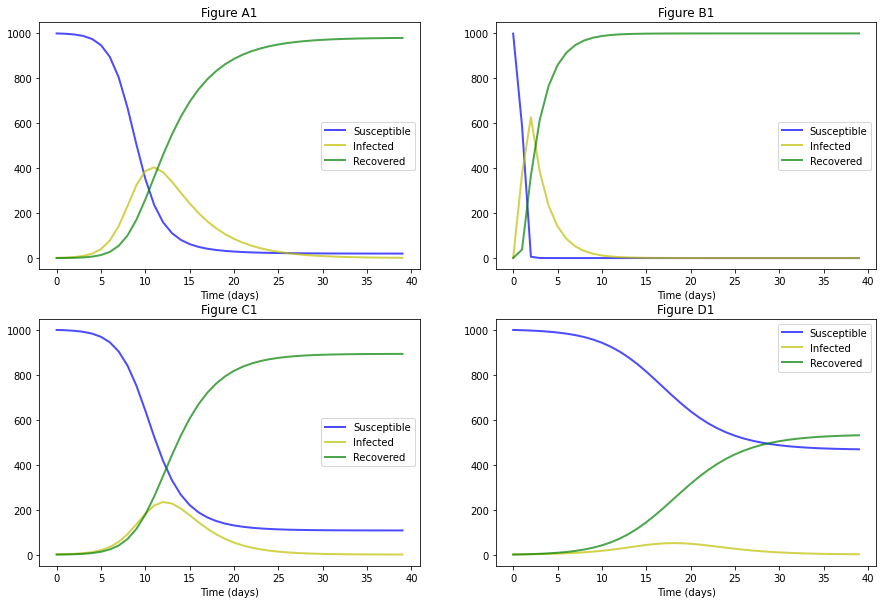

In [13]:
plt.subplots(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('Figure A1'); beta = 1.0; mu = 0.25 #Infection lasts 4 time units (days)
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.subplot(2, 2, 2)
plt.title('Figure B1'); beta = 7; mu = 0.5 
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.subplot(2, 2, 3)
plt.title('Figure C1'); beta = 1; mu = 0.4 
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.subplot(2, 2, 4)
plt.title('Figure D1'); beta = 1; mu = 0.7
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.show()

In **Figure A**, we see that the maximum ratio of infections is reached after about 12 days; we can modify this to fit a different, more contagious epidemic, such as in **Figure B**. As we can see, in this crazy scenario, the peak is reached really abruptly, since the infection is incredibly contagious. The peak of infected individuals is reached afyer only 3 days, and, after 12 days, all the population (N=1000) is recovered (since this model does not account for deaths). With a more mild disease, the infected curve can be less and less steep, making the epidemic last longer, but probably overcharging the sanitary system less: see **Figure C**. We can even have a disease so mild it fails to infect all the population! In **Figure D**, a form of "herd immunity" is reached after 30 days.

We can also use this to confirm there are no endemic states when variating the initial conditions:

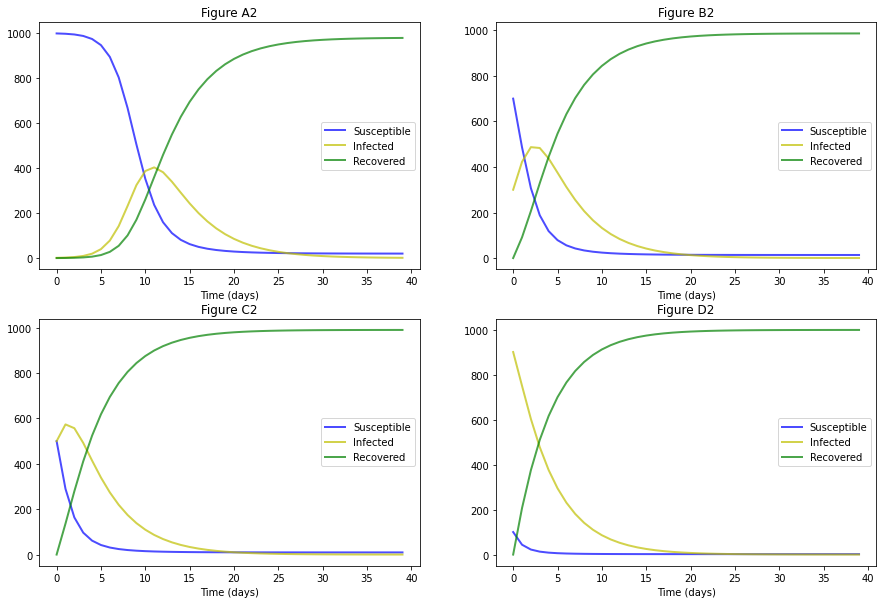

In [14]:
beta = 1.0; mu = 0.25 #Set params as in Figure A
plt.subplots(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('Figure A2'); S0, I0, R0 = 999, 1, 0; y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.subplot(2, 2, 2)
plt.title('Figure B2'); S0, I0, R0 = 700, 300, 0; y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.subplot(2, 2, 3)
plt.title('Figure C2'); S0, I0, R0 = 500, 500, 0 ; y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.subplot(2, 2, 4)
plt.title('Figure D2'); S0, I0, R0 = 100, 900, 0 ; y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.show()

As can be seen, the system behaves the same, changing the initial conditions is equivalent to moving the start of the epidemic over the "days" axis

Finally, we can fix **both** the initial conditions **and** the value of the epidemic threshold, and change $\beta$ and $\mu$, such that we can better understand the qualitative role of such parameters. If we fix, say, $R_{0}$ = 1.5, $S_{0}$ = 999 and $I_{0}$ = 1, all possible combinations of $\beta$ and $\mu$ might given by $\beta = \mu \cdot 1.5015$. Thus:

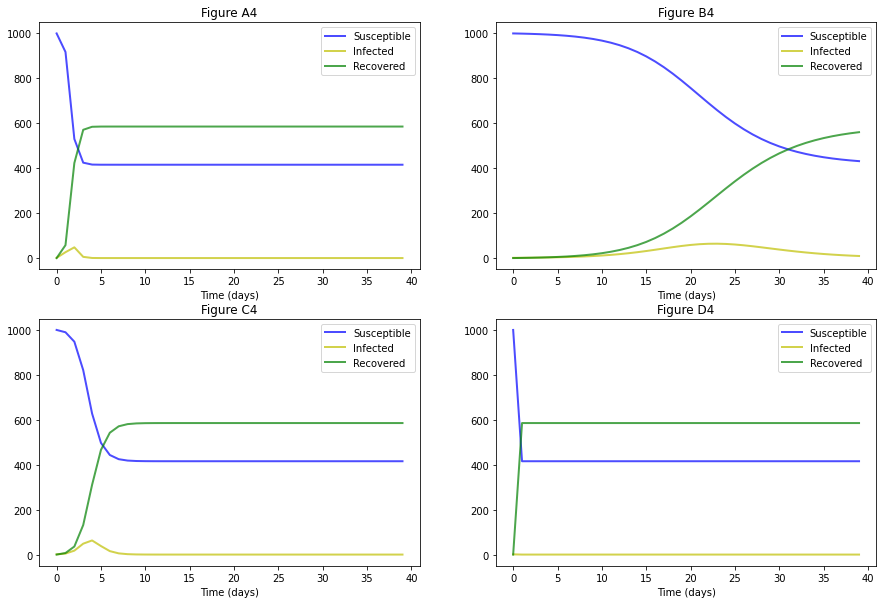

In [15]:
S0, I0, R0 = 999, 1, 0
y0 = S0, I0, R0
plt.subplots(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('Figure A4'); beta = 10.5105; mu = 7 #Infection lasts 4 time units (days)
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.subplot(2, 2, 2)
plt.title('Figure B4'); beta = 0.75075; mu = 0.5
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.subplot(2, 2, 3)
plt.title('Figure C4'); beta = 4.5045; mu = 3 
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.subplot(2, 2, 4)
plt.title('Figure D4'); beta = 150.15; mu = 100
ret = odeint(deriv, y0, t, args=(N, beta, mu)); S, I, R = ret.T
plotsir(t,S,I,R)
plt.show()

Here, we can see that, despite keeping $R_{0}$ stable, the widely different combinations of $\beta$ and $\mu$ produce quite different results; after all, it is $\beta$ and $\mu$ that define the evolution of the epidemic, with $R_{0}$ only an indirect way to know wether the population will keep rising or not; here, since $R_{0}$ was not that big (only 1.5) and the population was quite small (only 1000 individuals) the herd inmunity treshold is easy to reach. Nonetheless, despite the big visual differences among the graphs, we can see that all of them show quite similar evolutions, only with different time scales; thus, $R_{0}$ remains an interesting estimator of the general evolution of an epidemic. 

With regards to the **qualitative role of the parameters**, $\beta$ represents the number of infected persons per sick individual per day, and $\mu$ the rate at which infected individuals recover. The bigger the first and the smallest the second, the more agressive the epidemic is.